# **Advanced lane line** 
The goals / steps of this project are the following:  

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply the distortion correction to the raw image.  
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view"). 
* Detect lane pixels and fit to find lane boundary.
* Determine curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

The images for camera calibration are stored in the folder called `camera_cal`.  The images in `test_images` are for testing your pipeline on single frames.  The video called `project_video.mp4` is the video your pipeline should work well on.  `challenge_video.mp4` is an extra (and optional) challenge for you if you want to test your pipeline.

If you're feeling ambitious (totally optional though), don't stop there!  We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!

## Camera Calibration

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


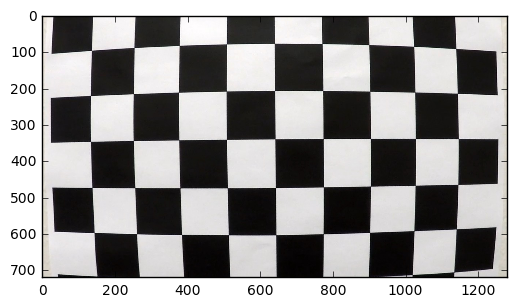

In [2]:
#reading in an image
image = mpimg.imread('camera_cal/calibration1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray) to show a image

In [3]:
import glob

images = glob.glob('camera_cal/calibration*.jpg')

objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image place

objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

## Apply the distortion correction to the raw image

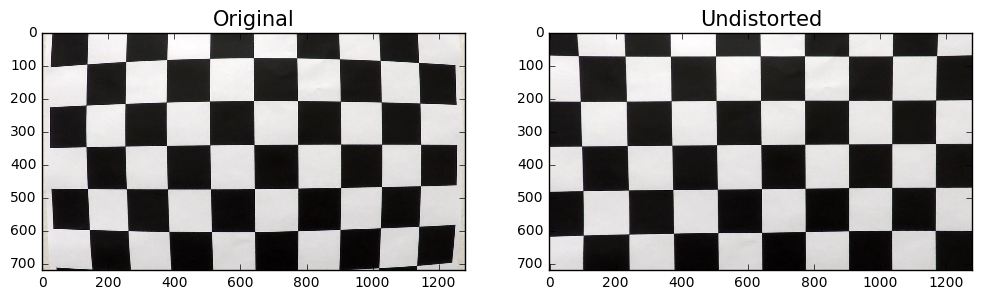

In [4]:
image = mpimg.imread('camera_cal/calibration1.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 10))
ax1.imshow(image)
ax1.set_title('Original', fontsize=15)
ax2.imshow(undst)
ax2.set_title('Undistorted', fontsize=15)


## Perspective transform

## Use color transforms, gradients, etc., to create a thresholded binary image and then do a perspective transform

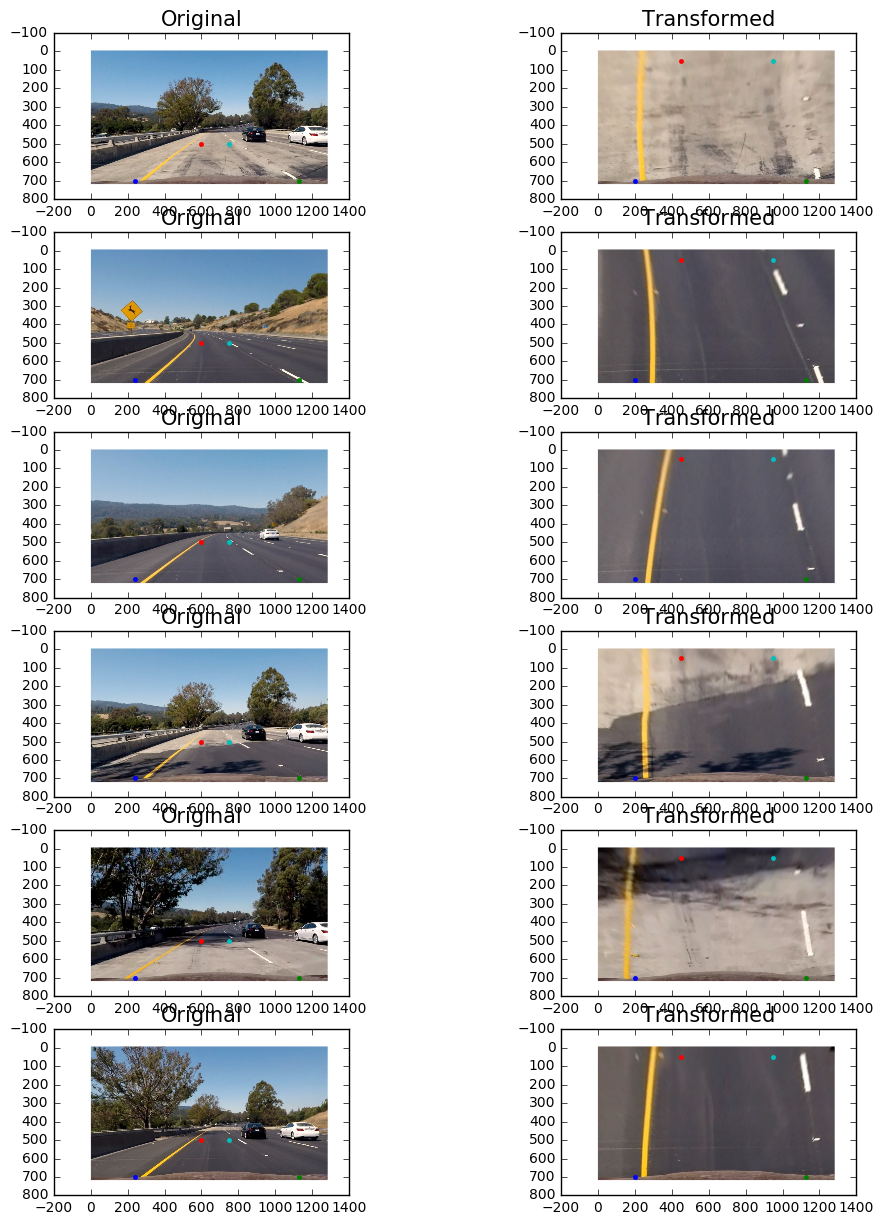

In [40]:
def perspective_transform(undist_image, src, dst, img_size):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist_image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

image = mpimg.imread('test_images/test1.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)
src =  np.float32([[240,700],[1130,700],[600,500],[750,500]])
dst = np.float32([[200,700],[1200,700],[450,50],[950,50]])

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(12, 15))

#trans_image = cv2.fillConvexPoly(undst, np.array([[270,700],[1130,700],[800,500],[500,520]]), (0,255,0) )

ax1.imshow(undst)
ax1.plot(240, 700, ".")
ax1.plot(1130, 700, ".")
ax1.plot(600, 500, ".")
ax1.plot(750, 500, ".")
ax1.set_title('Original', fontsize=15)

transformed = perspective_transform(undst, src, dst, (image.shape[1], image.shape[0]))
ax2.imshow(transformed)
ax2.plot(200, 700, ".")
ax2.plot(1130, 700, ".")
ax2.plot(450, 50, ".")
ax2.plot(950, 50, ".")
ax2.set_title('Transformed', fontsize=15)

image = mpimg.imread('test_images/test2.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)
ax3.imshow(undst)
ax3.plot(240, 700, ".")
ax3.plot(1130, 700, ".")
ax3.plot(600, 500, ".")
ax3.plot(750, 500, ".")
ax3.set_title('Original', fontsize=15)

transformed = perspective_transform(undst, src, dst, (image.shape[1], image.shape[0]))
ax4.imshow(transformed)
ax4.plot(200, 700, ".")
ax4.plot(1130, 700, ".")
ax4.plot(450, 50, ".")
ax4.plot(950, 50, ".")
ax4.set_title('Transformed', fontsize=15)

image = mpimg.imread('test_images/test3.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)
ax5.imshow(undst)
ax5.plot(240, 700, ".")
ax5.plot(1130, 700, ".")
ax5.plot(600, 500, ".")
ax5.plot(750, 500, ".")
ax5.set_title('Original', fontsize=15)

transformed = perspective_transform(undst, src, dst, (image.shape[1], image.shape[0]))
ax6.imshow(transformed)
ax6.plot(200, 700, ".")
ax6.plot(1130, 700, ".")
ax6.plot(450, 50, ".")
ax6.plot(950, 50, ".")
ax6.set_title('Transformed', fontsize=15)

image = mpimg.imread('test_images/test4.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)
ax7.imshow(undst)
ax7.plot(240, 700, ".")
ax7.plot(1130, 700, ".")
ax7.plot(600, 500, ".")
ax7.plot(750, 500, ".")
ax7.set_title('Original', fontsize=15)

transformed = perspective_transform(undst, src, dst, (image.shape[1], image.shape[0]))
ax8.imshow(transformed)
ax8.plot(200, 700, ".")
ax8.plot(1130, 700, ".")
ax8.plot(450, 50, ".")
ax8.plot(950, 50, ".")
ax8.set_title('Transformed', fontsize=15)

image = mpimg.imread('test_images/test5.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)
ax9.imshow(undst)
ax9.plot(240, 700, ".")
ax9.plot(1130, 700, ".")
ax9.plot(600, 500, ".")
ax9.plot(750, 500, ".")
ax9.set_title('Original', fontsize=15)

transformed = perspective_transform(undst, src, dst, (image.shape[1], image.shape[0]))
ax10.imshow(transformed)
ax10.plot(200, 700, ".")
ax10.plot(1130, 700, ".")
ax10.plot(450, 50, ".")
ax10.plot(950, 50, ".")
ax10.set_title('Transformed', fontsize=15)

image = mpimg.imread('test_images/test6.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)
ax11.imshow(undst)
ax11.plot(240, 700, ".")
ax11.plot(1130, 700, ".")
ax11.plot(600, 500, ".")
ax11.plot(750, 500, ".")
ax11.set_title('Original', fontsize=15)

transformed = perspective_transform(undst, src, dst, (image.shape[1], image.shape[0]))
ax12.imshow(transformed)
ax12.plot(200, 700, ".")
ax12.plot(1130, 700, ".")
ax12.plot(450, 50, ".")
ax12.plot(950, 50, ".")
ax12.set_title('Transformed', fontsize=15)

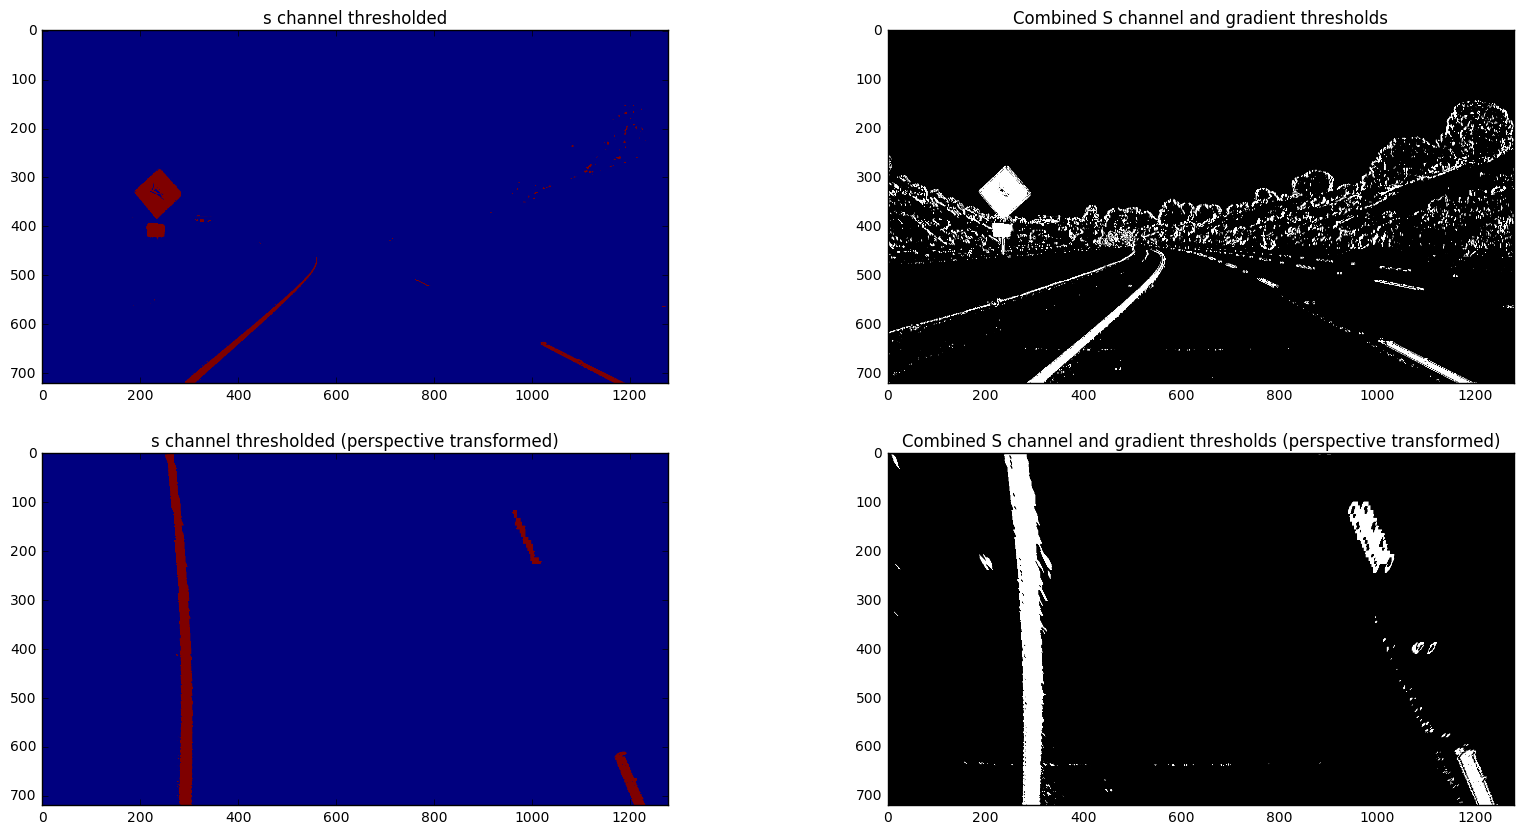

In [24]:
def color_transform(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
        
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return s_binary, combined_binary
    

image1 = mpimg.imread('test_images/test1.jpg')
undst1 = cv2.undistort(image, mtx, dist, None, mtx)

image2 = mpimg.imread('test_images/test2.jpg')
undst2 = cv2.undistort(image, mtx, dist, None, mtx)

image3 = mpimg.imread('test_images/test3.jpg')
undst3 = cv2.undistort(image, mtx, dist, None, mtx)

image4 = mpimg.imread('test_images/test4.jpg')
undst4 = cv2.undistort(image, mtx, dist, None, mtx)

image5 = mpimg.imread('test_images/test5.jpg')
undst5 = cv2.undistort(image, mtx, dist, None, mtx)
 
image6 = mpimg.imread('test_images/test6.jpg')
undst6 = cv2.undistort(image, mtx, dist, None, mtx)

s_b, combined_b = color_transform(image1)

s_b_transformed = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed = perspective_transform(combined_b, src, dst, (combined_b.shape[1], combined_b.shape[0]))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))
ax1.set_title('s channel thresholded')
ax1.imshow(s_b)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_b, cmap='gray')

ax3.set_title('s channel thresholded (perspective transformed)')
ax3.imshow(s_b_transformed)

ax4.set_title('Combined S channel and gradient thresholds (perspective transformed)')
ax4.imshow(combined_b_transformed, cmap='gray')




## Detect lane pixels and fit to find lane boundary.

In [31]:
import scipy.signal

def transpose_line(combined_b_trans_img):
    xcord_left_line = []
    ycord_left_line = []
    xcord_right_line = []
    ycord_right_line = []

    size = combined_b_trans_img.shape[0]//100
    
    for i in range(0, 100):
        start = i * combined_b_trans_img.shape[0]//100
        end = (i + 1) * combined_b_trans_img.shape[0]//100
        histogram = np.sum(combined_b_trans_img[start:end,:], axis=0)
        peaks = np.array(scipy.signal.find_peaks_cwt(histogram, np.array([200])))

        if len(peaks) == 0:
            peaks = None
            continue

        if len(peaks) == 1:
            xcord_left_line.append(peaks[0])
            ycord_left_line.append(int(i * combined_b_trans_img.shape[0] // 100))
        else:
            xcord_left_line.append(peaks[0])
            ycord_left_line.append(int(i * combined_b_trans_img.shape[0] // 100))
            xcord_right_line.append(peaks[1])
            ycord_right_line.append(int(i * combined_b_trans_img.shape[0] // 100))

    ycord_left_line = np.array(ycord_left_line)
    xcord_left_line = np.array(xcord_left_line)
    ycord_left_line = ycord_left_line[::-1]
    xcord_left_line = xcord_left_line[::-1]

    ycord_right_line = np.array(ycord_right_line)
    xcord_right_line = np.array(xcord_right_line)
    ycord_right_line = ycord_right_line[::-1]
    xcord_right_line = xcord_right_line[::-1]

    # Fit a second order polynomial to each lane line
    left_fit = np.polyfit(np.array(ycord_left_line), np.array(xcord_left_line), 2)
    left_fitx = left_fit[0] * np.array(ycord_left_line) ** 2 + left_fit[1] * np.array(ycord_left_line) + left_fit[2]

    right_fit = np.polyfit(np.array(ycord_right_line), np.array(xcord_right_line), 2)
    right_fitx = right_fit[0] * np.array(ycord_right_line) ** 2 + right_fit[1] * np.array(ycord_right_line) + right_fit[2]

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    y_eval_left = np.max(ycord_left_line)
    y_eval_right = np.max(ycord_right_line)
    
    left_fit_cr = np.polyfit(np.array(ycord_left_line)*ym_per_pix, np.array(xcord_left_line)*xm_per_pix, 2)
    right_fit_cr = np.polyfit(np.array(ycord_right_line)*ym_per_pix, np.array(xcord_right_line)*xm_per_pix, 2)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval_left + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval_right + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
    
    return left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad

    
left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad = transpose_line(combined_b_transformed)


## Warp the detected lane boundaries back onto the original image.

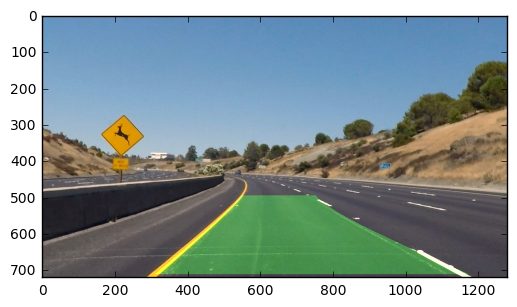

In [32]:
def drawlines(transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(combined_b_transformed).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ycord_left_line]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ycord_right_line])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = perspective_transform(color_warp, dst, src , (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undst, 1, newwarp, 0.3, 0)
    return result

r = drawlines(combined_b_transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst)
plt.imshow(r)

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [35]:
from moviepy.editor import VideoFileClip

def pipeline(image):
    undst = cv2.undistort(image, mtx, dist, None, mtx)

    s_b, combined_b = color_transform(image)
    #s_b_transformed = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
    combined_b_transformed = perspective_transform(combined_b, src, dst, (combined_b.shape[1], combined_b.shape[0]))
    
    left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad = transpose_line(combined_b_transformed)
    r = drawlines(combined_b_transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst)
    return r

clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(pipeline)

%time project_clip.write_videofile('project_video_updated.mp4', audio=False)



[MoviePy] >>>> Building video project_video_updated.mp4
[MoviePy] Writing video project_video_updated.mp4


100%|█████████▉| 1260/1261 [41:07<00:01,  1.85s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_updated.mp4 

CPU times: user 59min 8s, sys: 1min 30s, total: 1h 38s
Wall time: 41min 8s


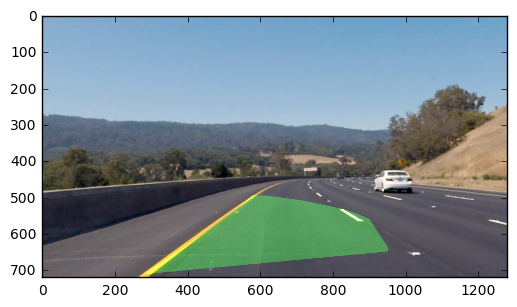

In [38]:
# test pipeline for images
image = mpimg.imread('test_images/test3.jpg')
r = pipeline(image)
plt.imshow(r)